# Explore the dataset


In this notebook, we will perform an EDA (Exploratory Data Analysis) on the processed Waymo dataset (data in the `processed` folder). In the first part, you will create a function to display 

In [4]:
%matplotlib nbagg
%matplotlib inline
from utils import get_dataset
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

In [9]:
dataset = get_dataset("/home/workspace/data_waymo/processed/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord")

INFO:tensorflow:Reading unweighted datasets: ['/home/workspace/data_waymo/processed/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord']
INFO:tensorflow:Reading record datasets for input file: ['/home/workspace/data_waymo/processed/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord']
INFO:tensorflow:Number of filenames to read: 1


## Write a function to display an image and the bounding boxes

Implement the `display_instances` function below. This function takes a batch as an input and display an image with its corresponding bounding boxes. The only requirement is that the classes should be color coded (eg, vehicles in red, pedestrians in blue, cyclist in green).

In [10]:
def compute_length(dataset):
    l = 0
    for _ in dataset:
        l += 1
    return l
def display_instances(dataset):
    """
    This function takes a dataset (create subset using take) from the dataset and displays the images with 
    the associated bounding boxes.
    """
    n = compute_length(dataset)
    num_cols = 3
    num_rows = (n-1) // num_cols + 1
    figwidth = 15
    fig, axs = plt.subplots(num_rows, num_cols)
    fig.set_figwidth(figwidth)
    fig.set_figheight(figwidth *num_rows/num_cols)
    color_map = { 1: '#ff0000', 2 : '#00ff00', 4 : '#0000ff' }
    current_row = 0
    current_col = 0
    for x in dataset:
        if num_cols > 1:
            ax = axs[current_row,current_col]
        else:
            ax = axs[current_row]
        ax.imshow(x['image'])
        image_width = x['original_image_spatial_shape'][1]
        image_height = x['original_image_spatial_shape'][0]
        for box_idx in range(x['groundtruth_boxes'].shape[0]):
            bbox = x['groundtruth_boxes'][box_idx,:].numpy()
            y1, x1, y2, x2 = bbox
            class_of_this_box = x['groundtruth_classes'][box_idx].numpy().item()
            color_of_this_class = color_map[class_of_this_box]
            scale_x = float(image_width)
            scale_y = float(image_height)
            width = (x2-x1)* scale_x
            height = (y2-y1)* scale_y
            rectangle = Rectangle(
                (x1 * scale_x, y1 * scale_y),
                width = width,
                height = height,
                linewidth = 1,
                color = color_of_this_class,
                fill = False)
            ax.add_patch(rectangle)
        current_col += 1
        if current_col== num_cols:
            current_col = 0
            current_row += 1
    for current_row in range(num_rows):
        for current_col in range(num_cols):
            axs[current_row, current_col].axis('off')
    plt.show()

## Display 10 images 

Using the dataset created in the second cell and the function you just coded, display 10 random images with the associated bounding boxes. You can use the methods `take` and `shuffle` on the dataset.

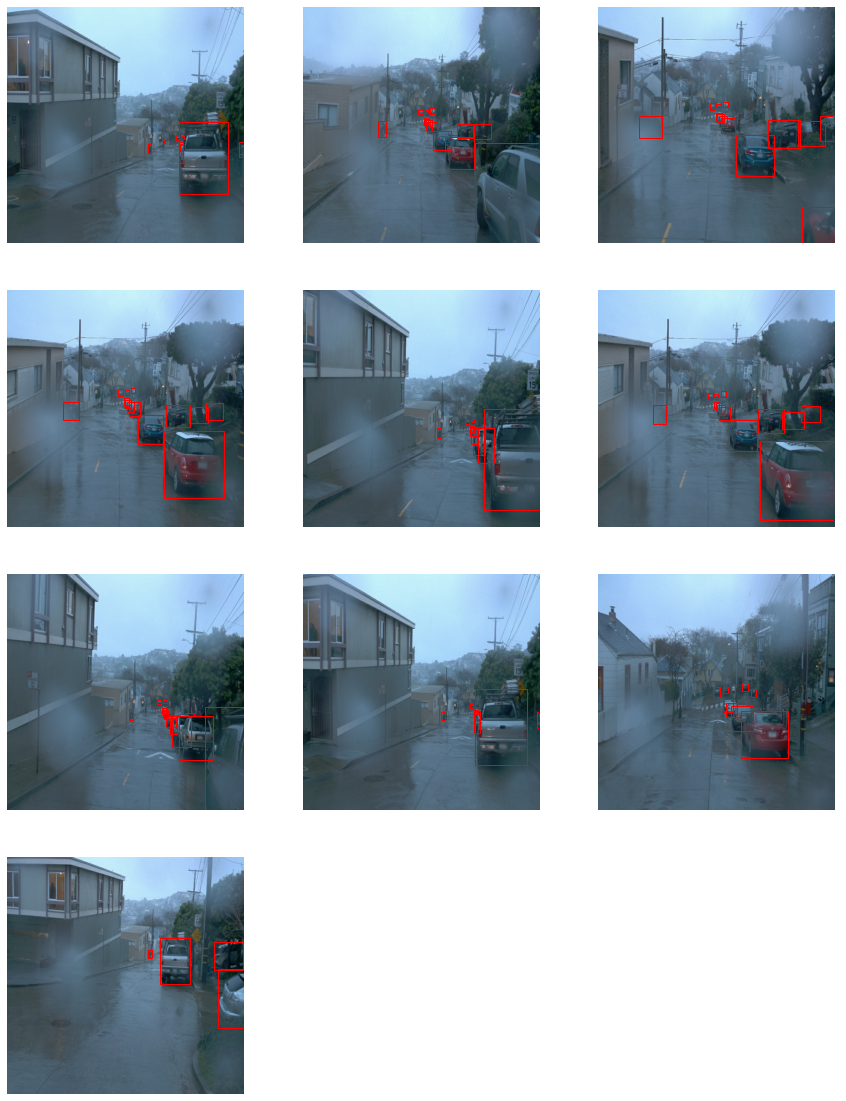

In [11]:
ds_10 = dataset.shuffle(buffer_size=100).take(count=10)
display_instances(ds_10)


## Additional EDA

In this last part, you are free to perform any additional analysis of the dataset. What else would like to know about the data?
For example, think about data distribution. So far, you have only looked at a single file...

## Dataset entry format

In [12]:
for x in ds_10:
    for key in x.keys():
        print('Entry key = ', key, ', value =', x[key])
    break

Entry key =  image , value = tf.Tensor(
[[[159 206 250]
  [159 206 250]
  [161 208 250]
  ...
  [ 56  71  78]
  [ 54  68  77]
  [ 53  67  76]]

 [[165 212 255]
  [159 206 250]
  [161 208 250]
  ...
  [ 56  71  78]
  [ 55  69  78]
  [ 55  69  78]]

 [[161 208 252]
  [162 209 253]
  [164 211 253]
  ...
  [ 58  72  81]
  [ 58  75  83]
  [ 59  76  84]]

 ...

 [[ 65  78  84]
  [ 67  80  88]
  [ 68  82  91]
  ...
  [ 43  67  77]
  [ 39  66  77]
  [ 41  68  77]]

 [[ 66  81  88]
  [ 67  82  89]
  [ 67  81  90]
  ...
  [ 42  67  74]
  [ 38  65  74]
  [ 40  67  74]]

 [[ 72  87  94]
  [ 71  86  93]
  [ 69  83  92]
  ...
  [ 40  65  72]
  [ 38  65  72]
  [ 42  69  76]]], shape=(640, 640, 3), dtype=uint8)
Entry key =  source_id , value = tf.Tensor(b'segment-10017090168044687777_6380_000_6400_000_with_camera_labels_83.tfrecord', shape=(), dtype=string)
Entry key =  key , value = tf.Tensor(b'', shape=(), dtype=string)
Entry key =  filename , value = tf.Tensor(b'segment-10017090168044687777_6380_00